<a href="https://colab.research.google.com/github/Kynantio/MachineLearning/blob/main/UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Kynantio Candra Abrari
##2141720206 / 3A / 16

1. Pilih 5 citra plat nomor untuk setiap anggota kelompok dari dataset yang telah disediakan.
2. Lakukan segmentasi pada citra plat nomor untuk memperjelas karakter pada plat nomor.
3. Anda dapat menggunakan algortima K-Means seperti yang telah dijelaskan pada praktikum sebelumnya atau menggunakan algoritma klasterisasi yang lain.
4. Anda diperkenankan untuk melakukan pra pengolahan data (preprocessing) pada citra seperti,
- Merubah color space
- Reduksi dimensi
- dsb
5. Tampilkan perbandingan citra antara sebelum dan sesudah di segmentasi

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab

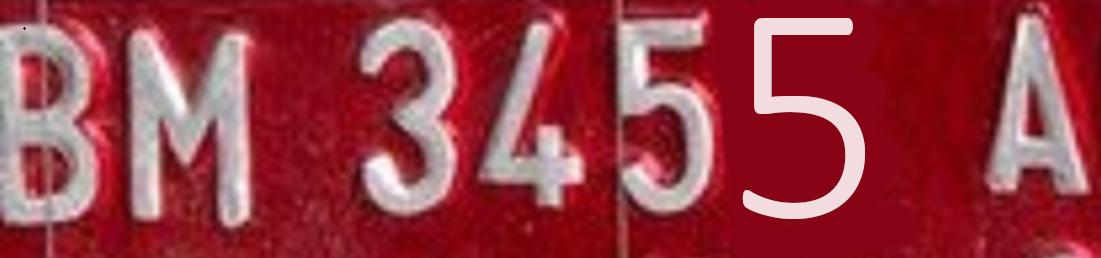

In [3]:
img = cv2.imread('/content/drive/MyDrive/Polinema/Machine Learning/BM3455A.jpg')

cv2_imshow(img)

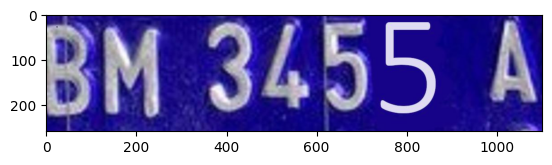

In [5]:
plt.imshow(img)

In [6]:
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

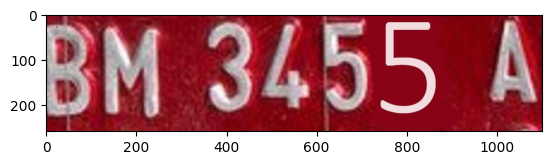

In [7]:
plt.imshow(img2)

In [8]:
img.shape

(258, 1101, 3)

In [9]:
h, w, ch= img.shape
print(h)
print(w)
print(ch)

258
1101
3


In [10]:
data = img / 255.0
data = data.reshape(h * w, ch)
data.shape

(284058, 3)

In [11]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

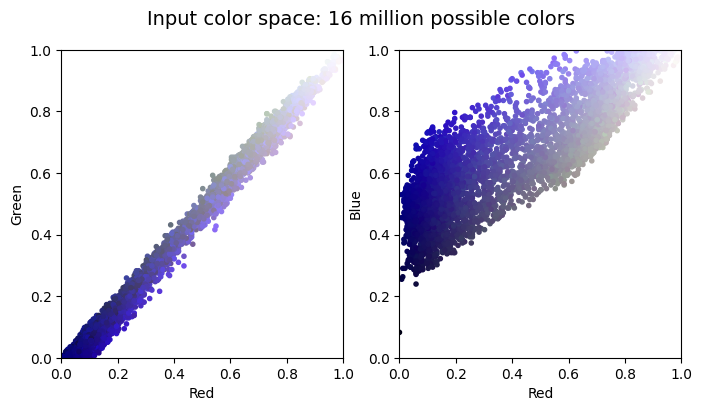

In [12]:
plot_pixels(data, title='Input color space: 16 million possible colors')

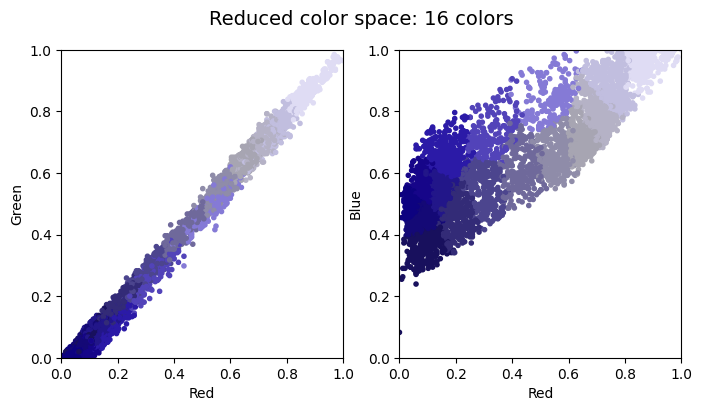

In [13]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

In [14]:
#convert int menjadi float
Z = np.float32(data)

In [15]:
print(Z.dtype, Z.shape)

float32 (284058, 3)


In [16]:
kriteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 1.0)
k=2
ret, label, center = cv2.kmeans(Z,k,None,kriteria,10,cv2.KMEANS_RANDOM_CENTERS)

In [17]:
print(label)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [18]:
print(center)

[[0.11439769 0.06348193 0.52409106]
 [0.675755   0.6606884  0.78324497]]


In [19]:
segmented_data = center[label.flatten()]
segmented_data

array([[0.11439769, 0.06348193, 0.52409106],
       [0.11439769, 0.06348193, 0.52409106],
       [0.11439769, 0.06348193, 0.52409106],
       ...,
       [0.11439769, 0.06348193, 0.52409106],
       [0.11439769, 0.06348193, 0.52409106],
       [0.11439769, 0.06348193, 0.52409106]], dtype=float32)

In [20]:
segmented_image = segmented_data.reshape((img2.shape))
segmented_image

array([[[0.11439769, 0.06348193, 0.52409106],
        [0.11439769, 0.06348193, 0.52409106],
        [0.11439769, 0.06348193, 0.52409106],
        ...,
        [0.11439769, 0.06348193, 0.52409106],
        [0.11439769, 0.06348193, 0.52409106],
        [0.11439769, 0.06348193, 0.52409106]],

       [[0.11439769, 0.06348193, 0.52409106],
        [0.11439769, 0.06348193, 0.52409106],
        [0.11439769, 0.06348193, 0.52409106],
        ...,
        [0.11439769, 0.06348193, 0.52409106],
        [0.11439769, 0.06348193, 0.52409106],
        [0.11439769, 0.06348193, 0.52409106]],

       [[0.11439769, 0.06348193, 0.52409106],
        [0.11439769, 0.06348193, 0.52409106],
        [0.11439769, 0.06348193, 0.52409106],
        ...,
        [0.11439769, 0.06348193, 0.52409106],
        [0.11439769, 0.06348193, 0.52409106],
        [0.11439769, 0.06348193, 0.52409106]],

       ...,

       [[0.11439769, 0.06348193, 0.52409106],
        [0.11439769, 0.06348193, 0.52409106],
        [0.11439769, 0

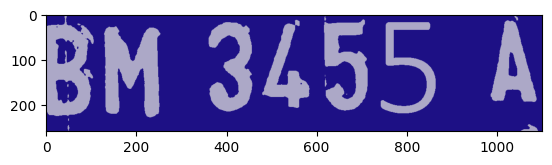

In [21]:
plt.imshow(segmented_image)

Text(0.5, 1.0, '2-color Image')

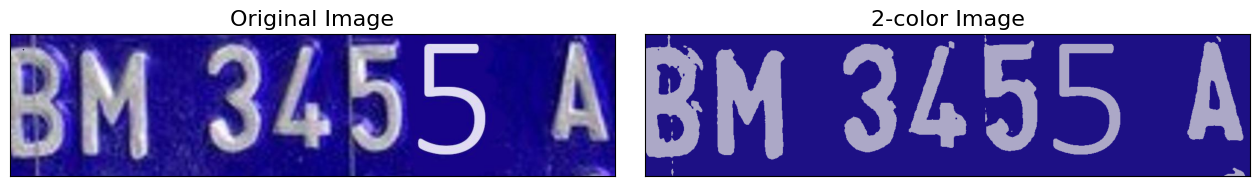

In [22]:
img_recolored = new_colors.reshape(img2.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(img)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(segmented_image)
ax[1].set_title('2-color Image', size=16)

In [23]:
# Daftar path gambar plat
plat_paths = [
    '/content/drive/MyDrive/Polinema/Machine Learning/BG6988A.jpg',
    '/content/drive/MyDrive/Polinema/Machine Learning/BG9988D.jpg',
    '/content/drive/MyDrive/Polinema/Machine Learning/BM3453A.jpg',
    '/content/drive/MyDrive/Polinema/Machine Learning/BM9098.jpg',
    '/content/drive/MyDrive/Polinema/Machine Learning/BM45558.jpg'
]

In [24]:
# Fungsi untuk segmentasi gambar
def segment_image(img_path, k=2):
    # Load gambar
    img = cv2.imread(img_path)
    img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, ch = img1.shape
    data = img1 / 255.0
    data = data.reshape(h * w, ch)

    #proses penggunaan algoritme K-Means untuk segmentasi gambar
    kmeans = MiniBatchKMeans(n_clusters=2, n_init=3)
    kmeans.fit(data)
    new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
    Z = np.float32(data)

    # menentukan nilai k
    kriteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 1.0)
    k = 2
    ret, label, center = cv2.kmeans(Z, k, None, kriteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    #proses segmentasi gambar menggunakan algoritma K-Means.
    segmented_data = center[label.flatten()]
    segmented_image = segmented_data.reshape((img1.shape))

    # Memanggil fungsi plot pixel
    plot_pixels(data, colors=new_colors, title="Reduced color space: 16 colors")

    # Memanggil fungsi img_comparison dengan citra asli dan citra hasil segmentasi
    img_comparison(img1, segmented_image)

In [25]:
# Fungsi untuk plot piksel
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # Pilih subset acak
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=12)

In [26]:
# Fungsi untuk membandingkan gambar asli dan gambar yang telah di segmentasi.
def img_comparison(original, new_colors):
    segmented_img = new_colors.reshape(original.shape)
    fig, ax = plt.subplots(1, 2, figsize=(8, 2), subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(wspace=0.05)
    ax[0].imshow(original)
    ax[0].set_title('Original Image', size=12)
    ax[1].imshow(segmented_img)
    ax[1].set_title('2-color Image', size=12)

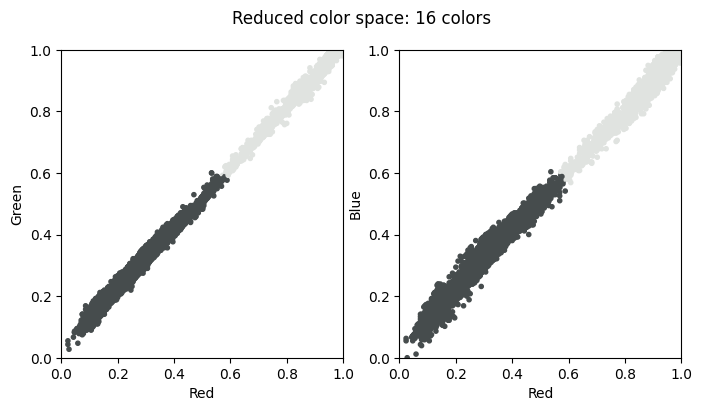

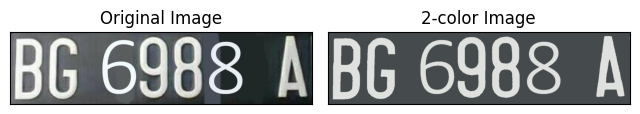

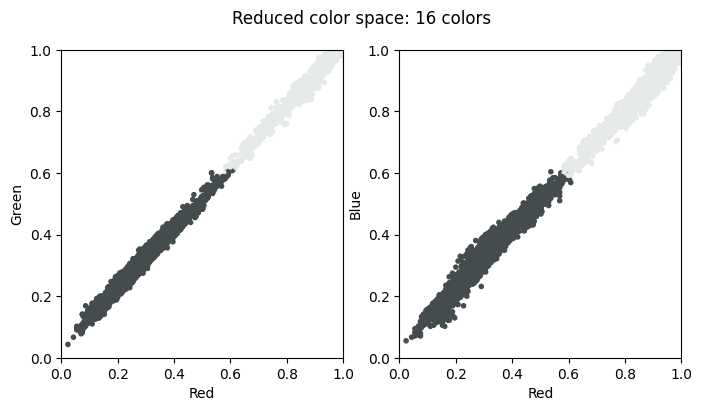

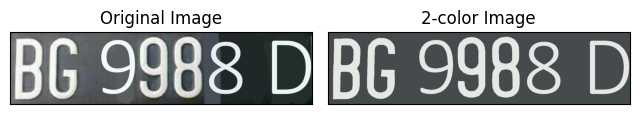

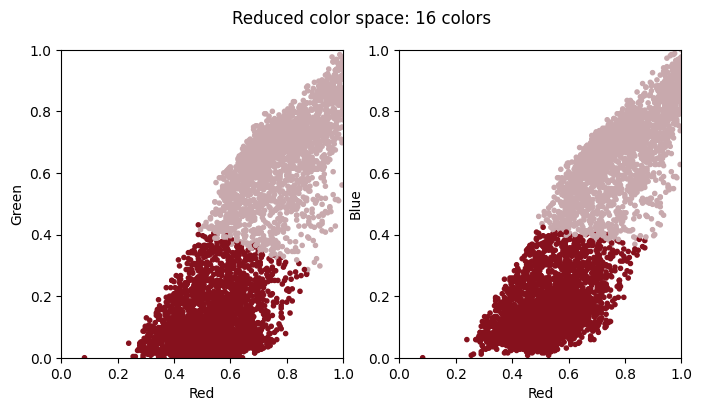

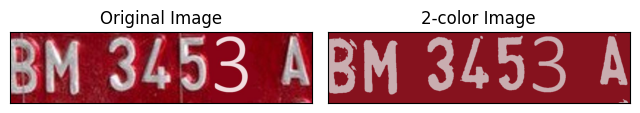

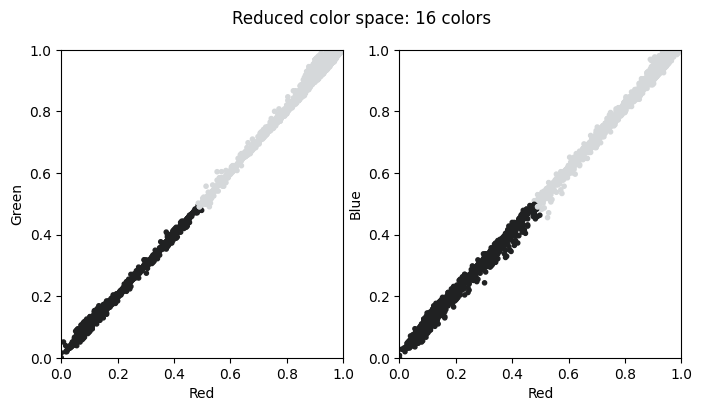

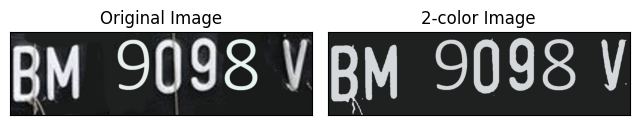

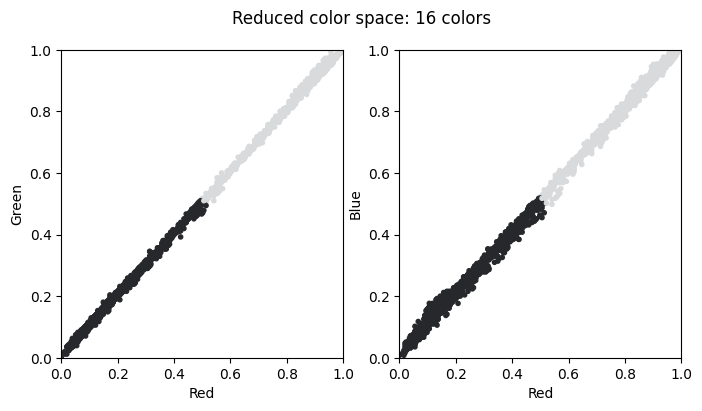

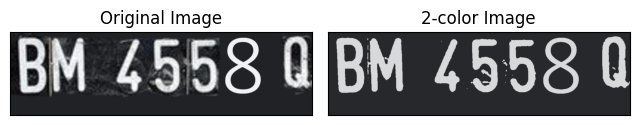

In [27]:
# Iterasi melalui gambar-gambar plat nomor dan melakukan segmentasi pada masing-masing
for plat_path in plat_paths:
    segment_image(plat_path)